In [192]:
## libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score

In [168]:
# collect the data from super-animal file
animals = pd.read_csv('../week 2/probability and statistics/super-animals.csv')

In [169]:
# read data
animals.head()

,Number,Animal,Category,Species,Age,Weight,Size,Speed,Vulnerability,Updated
0,1,White headed vulture,Savanna,Bird,20.0,4.7,85.0,48.0,1,No
1,2,Secretarybird,Savanna,Bird,12.0,4.0,152.0,65.0,2,Yes
2,3,Kudu,Savanna,Mammal,15.0,227.0,240.0,70.0,4,Yes
3,4,Blue wildebeest,Savanna,Mammal,20.0,250.0,240.0,80.0,4,No
4,5,Giraffe,Savanna,Mammal,25.0,828.0,505.0,56.0,4,No


In [170]:
# info
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Number         108 non-null    int64  
 1   Animal         108 non-null    object 
 2   Category       108 non-null    object 
 3   Species        108 non-null    object 
 4   Age            108 non-null    float64
 5   Weight         108 non-null    float64
 6   Size           108 non-null    float64
 7   Speed          108 non-null    float64
 8   Vulnerability  108 non-null    int64  
 9   Updated        108 non-null    object 
dtypes: float64(4), int64(2), object(4)
memory usage: 8.6+ KB


In [171]:
# subset only the birds from `animals`
birds = animals.loc[animals['Species'] == 'Bird', :]

In [172]:
birds

,Number,Animal,Category,Species,Age,Weight,Size,Speed,Vulnerability,Updated
0,1,White headed vulture,Savanna,Bird,20.0,4.700,85.0,48.0,1,No
1,2,Secretarybird,Savanna,Bird,12.0,4.000,152.0,65.0,2,Yes
9,10,Lilac breasted roller,Savanna,Bird,15.0,0.100,38.0,54.0,4,No
13,14,African jacana,Wetland,Bird,6.5,0.140,32.0,80.0,4,Yes
14,15,Greater flamingo,Wetland,Bird,30.0,3.500,150.0,50.0,4,Yes
15,16,Blue crane,Wetland,Bird,30.0,5.090,120.0,40.0,2,Yes
17,18,Giant kingfisher,Wetland,Bird,10.0,0.375,46.0,40.0,4,Yes
19,20,Southern bald ibis,Wetland,Bird,15.0,1.100,80.0,35.0,2,Yes
20,21,African fish eagle,Wetland,Bird,24.0,2.500,75.0,80.0,4,Yes
22,23,Brown hooded kingfisher,Wetland,Bird,20.0,0.580,23.0,17.0,4,No


In [173]:
# check duplicates
dups = animals.duplicated(keep= False)

print(animals[dups])                        #  no duplicates

Empty DataFrame
Columns: [Number, Animal, Category, Species, Age, Weight, Size, Speed, Vulnerability, Updated]
Index: []


In [174]:
birds['Weight'].shape

(36,)

In [175]:
birds['Size'].shape

(36,)

#### We want to check how the weight of animals is related to their sizes
#### relationship between weight and the size of animals

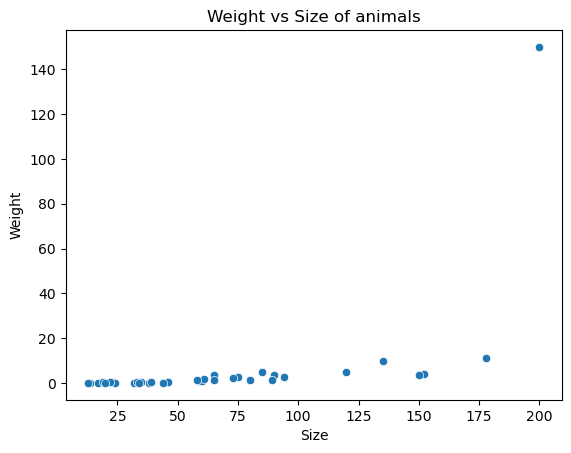

In [176]:
# plot scatter plot from sns
plot = sns.scatterplot(data= animals, x= birds['Size'], y= birds['Weight'])
plot.set(title= 'Weight vs Size of animals',
        xlabel= 'Size', ylabel= 'Weight')

plt.show()

#### Linearize the data for simple interpretation

In [177]:
# use log func from numpy
transformed_size = np.log(birds['Size'])
transformed_weight = np.log(birds['Weight'])

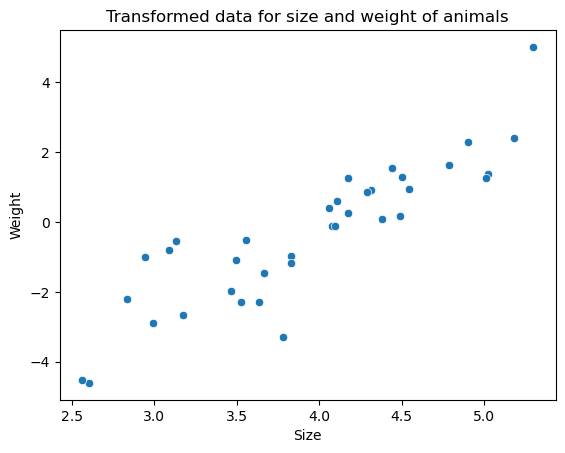

In [178]:
# plot the transformed data
transformed = sns.scatterplot(data= animals, x= transformed_size, y= transformed_weight)
transformed.set(title= 'Transformed data for size and weight of animals',
                xlabel= 'Size', ylabel= 'Weight')

plt.show()

#### Plot a line of best fit for this data

In [179]:
# fit the data and plot the line of best fit

In [180]:
x = np.array(transformed_size).reshape((-1, 1))
y = np.array(transformed_weight)

In [181]:
# from linear regression model
model = LinearRegression()

In [182]:
# fit the data
model_fit = model.fit(x, y)

In [183]:
# predictions
y_pred = model_fit.predict(x)

#### Fitted data

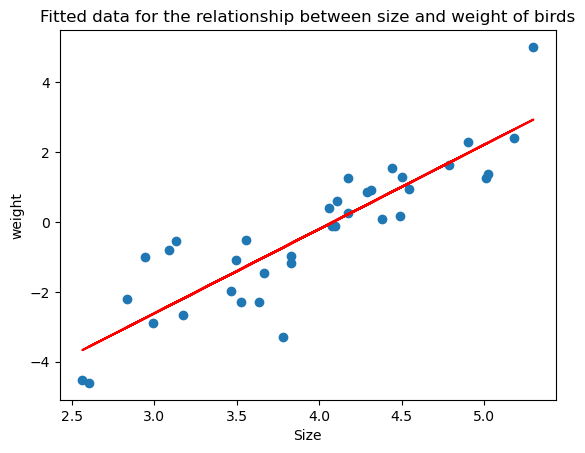

In [186]:
# plot the fitted data
plt.scatter(x, y)
plt.plot(x, y_pred, color= 'r')
plt.title('Fitted data for the relationship between size and weight of birds')
plt.xlabel('Size')
plt.ylabel('weight')

plt.show()

In [196]:
## score and perfomance
score = r2_score(y, y_pred)

score

0.7770849221964133

In [185]:
## find the equation of the stright line